In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("/content/drive/MyDrive/day71-K-means/data/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [7]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

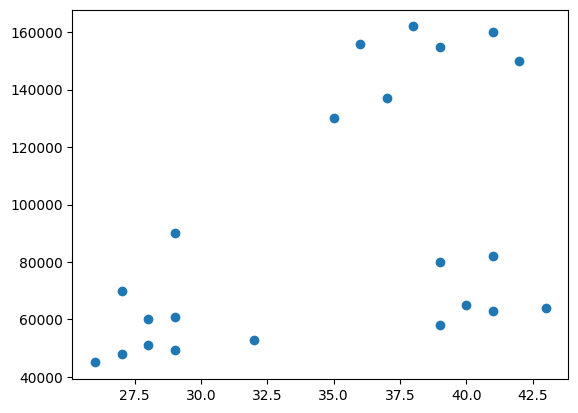

In [8]:
plt.scatter(df['Age'], df['Income($)'])

### Applying : K-Means Clustering

In [9]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [10]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [11]:
df['cluster'] = y_pred

In [12]:
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


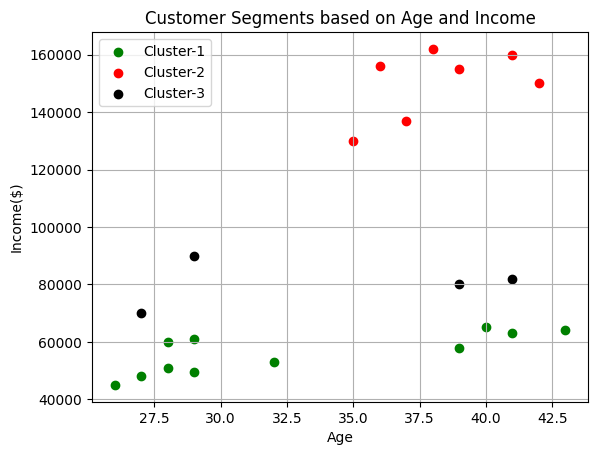

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster-1')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster-2')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster-3')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.title('Customer Segments based on Age and Income')
plt.grid(True)
plt.show()

### We got poor clustering when we made cluster without scaling features. To solve this issue we have to apply Scaling (eg. MinMax Scaler)

In [14]:
df.columns

Index(['Name', 'Age', 'Income($)', 'cluster'], dtype='object')

In [15]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])

#scaling 'Income' column
df['Income($)'] = scaler.transform(df[['Income($)']])

#scaling 'Age' column
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [16]:
df['Age'].std()

0.34712118493821353

In [17]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [18]:
df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [19]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

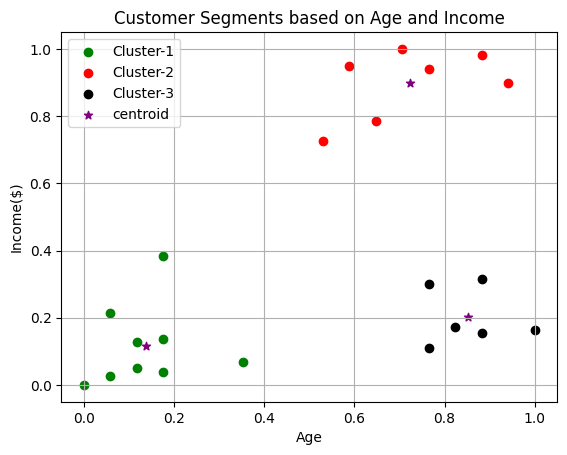

In [20]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster-1')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster-2')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster-3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.title('Customer Segments based on Age and Income')
plt.grid(True)
plt.show()

### Elbow Plot

In [21]:
sse = []
lst_of_k = [1,2,3,4,5,6,7,8,9,10]

for k in lst_of_k:
  # print(k)
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income($)']])

  # print(km.inertia_)
  sse.append(km.inertia_)

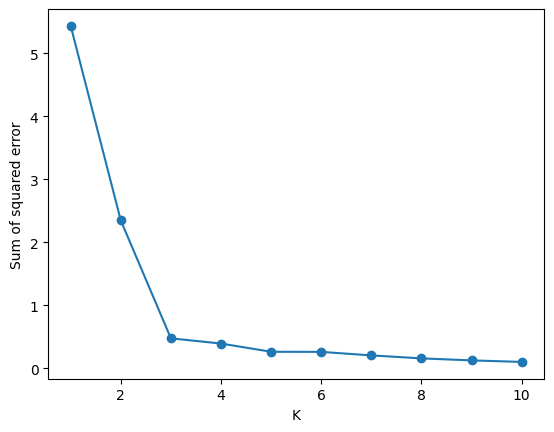

In [22]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(lst_of_k, sse, marker='o')

### Performance Metric : Silhouette Score

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_coefficients = []

for k in range(2, 11):
  km = KMeans(n_clusters=k, init='k-means++')
  km.fit(df[['Age', 'Income($)']])
  score = silhouette_score(df[['Age', 'Income($)']], km.labels_)
  silhouette_coefficients.append(score)

In [25]:
silhouette_coefficients

[np.float64(0.5600636053855829),
 np.float64(0.7129710183539274),
 np.float64(0.6094875531451848),
 np.float64(0.47976672793177627),
 np.float64(0.4251720801528369),
 np.float64(0.36707699806367056),
 np.float64(0.2977728984677759),
 np.float64(0.2881108873470838),
 np.float64(0.2807355366716056)]

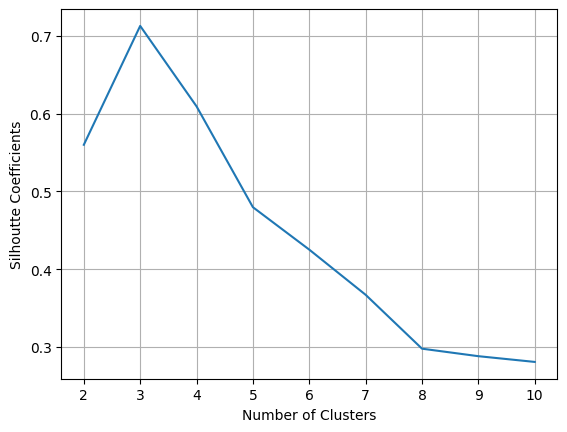

In [26]:
## plotting silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coefficients")
plt.grid()
plt.show()

# Silhouette score is closest to +1 at k=3, So k=3 is the optimal no. of cluster

### K-Means on 3D data

In [27]:
#making 3D data
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [28]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [29]:
X[:10]

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ]])

In [30]:
# import plotly.express as px
# fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
# fig.update_layout(width=600, height=400)
# fig.show()

In [31]:
wcss = []
lst_of_k = []

for i in range(1, 10+1):
  lst_of_k.append(i)
  km = KMeans(n_clusters=i)
  km.fit_predict(X)
  wcss.append(km.inertia_)

In [32]:
print(lst_of_k)
print(wcss)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[11143.784324503365, 4122.40955760353, 2163.269450436297, 593.2516262404542, 557.7696921875616, 527.6884963114702, 475.05776713366254, 447.657941358334, 433.5637182557842, 385.1467799566445]


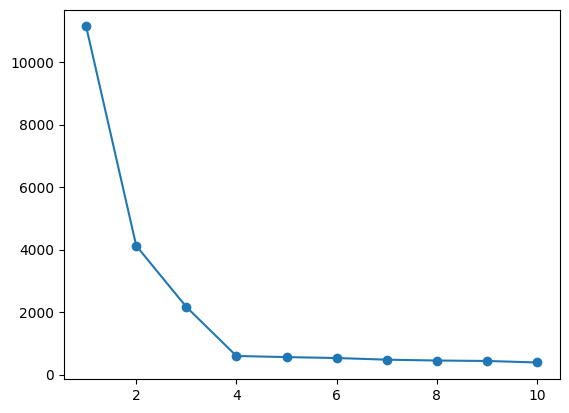

In [33]:
plt.plot(lst_of_k, wcss, marker='o')

In [34]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [35]:
df = pd.DataFrame()

df['col1'] = X[:, 0]
df['col2'] = X[:, 1]
df['col3'] = X[:, 2]
df['cluster'] = y_pred
df

,col1,col2,col3,cluster
0,4.334245,3.325804,-4.174970,3
1,-3.322467,3.221711,-4.625342,1
2,-6.072969,-4.134592,2.698461,0
3,6.904659,6.111057,-4.340950,3
4,-2.608392,2.950156,-2.234665,1
...,...,...,...,...
195,4.712692,5.680070,-5.319802,3
196,-4.137450,6.458603,-3.351356,1
197,-5.208894,-4.413377,5.838983,0
198,2.619422,-2.779098,5.622849,2


In [36]:
# fig = px.scatter_3d(df, x='col1', y='col2', z='col3', color='cluster')
# fig.update_layout(width=600, height=400)
# fig.show()